   # USED CARS PROJECT

DATA DICTIONARY

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in dollars
* Price: The price of the used car in dollars

IMPORTING THE NECESSARY LIBRARIES

In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [3]:
## IMPORTING THE LIBRARIRES FOR EXPLORING AND MANIPULATING THE DATASET

import pandas as pd
import numpy as np

# importing the libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# importing scikit learn libraries for training and modeling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import  StandardScaler

#importing the libraries for checking the model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [4]:
# This is to view the whole coloumns of the dataset
pd.set_option("display.max_columns", None)

## DATA EXPLORATION

LOADING THE DATASET

In [5]:
usedcars_data = pd.read_csv("used_cars_data-1.csv")

In [6]:

usedcars_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


* This will display full view of the dataset

In [7]:
# This is to display the information of the dataset
usedcars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


* This depicts the information of the dataset
* There are 14 columns, with 7253 entries, 8 objects, 3 integers and 3 floats data types
* There are some missing values which need to be addressed before building the model.

In [8]:
## To get the total rows and columns of the data set
usedcars_data.shape

(7253, 14)

* There are 7253 rows and 14 columns

In [9]:
# To get the descriptive statistics of the dataset
usedcars_data.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


* From the statistical decsription, it was noticed one of the seats value zero as its value which is not realistic for a car not
to have a seat.

In [10]:
## To check for the null values in the data set
usedcars_data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

* There are 1510 missing records in the dataset which will be addressed.
* The target(price) has the highest number of missing values which needs to be dropped. 

In [11]:
# Checking for the duplicate values in the dataset
usedcars_data.duplicated().sum()

0

* There are no duplicate value.

In [12]:
# Reset the index
usedcars_data.reset_index(drop = True, inplace = True)

In [13]:
# displays the descriptive statistics including the objects
usedcars_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 Observations
- There are some missing values
- The mean for the price is slightly higher than its median, which implies the distribution
will be right skewed.
- It was also observed that Seat which is one of the important vaaribles has a 
value with zero number of seats. This has to be addressed.

In [14]:
# Addressing the value of seat that has zero value

In [15]:
#Addressing the missing values for Mileage

usedcars_data[usedcars_data.Mileage.isnull()== True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75


In [16]:
usedcars_data[usedcars_data.Engine.isnull()== True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,4.550,1.93


- Observation
- Mileage have some missing values and some values as 0, which shouldn not as this
feature contributes largely to the price of the car.
- Same for Power and Seats.i.e Missing values and zero values

## DATA CLEANING

In [17]:
usedcars_data.drop("S.No.", axis =1, inplace= True)

* The serial number column will be dropped since pandas has its own columns.

In [18]:
# To view the number of columns and rows after dropping the S.No column.
usedcars_data.shape

(7253, 13)

In [19]:
usedcars_data.isnull().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [20]:
# Selecting our categorical varibales

categorical_cars= usedcars_data.select_dtypes(include = "object").columns.to_list()
categorical_cars

['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power']

- The values for Mileage,Engine and power are categorized as objects, however they are meant to
be either float or integer.
- These 3 variables are also determining factors for the price of the used cars.


In [21]:
# To get 5 random samples of the dataset
usedcars_data[["Mileage","Engine","Power"]].sample(5)

,Mileage,Engine,Power
7031,19.67 kmpl,1582 CC,126.2 bhp
5882,24.07 kmpl,998 CC,67.1 bhp
1806,21.1 kmpl,814 CC,55.2 bhp
5311,0.0 kmpl,2179 CC,115 bhp
2571,23.4 kmpl,1248 CC,74 bhp


In [22]:
# Separating the units from Mileage.

usedcars_data["Mileage"]= usedcars_data["Mileage"].str.rstrip("kmpl")
usedcars_data["Mileage"]= usedcars_data["Mileage"].str.rstrip("km/g")

In [23]:
# Separating the units from Engine
usedcars_data["Engine"]= usedcars_data["Engine"].str.rstrip("CC")

In [24]:
# Separating the units from Power
usedcars_data["Power"]= usedcars_data["Power"].str.rstrip("bhp")

In [25]:
#Confirming the random sample sets after removing the units
usedcars_data[["Mileage","Engine","Power"]].sample(15)

,Mileage,Engine,Power
2010,17.0,1198,73.75
6508,27.62,793,47
5241,17.0,1497,121.36
2471,19.34,1198,76
6960,19.0,2996,362.07
5339,17.19,1197,81.86
6646,25.44,936,56.3
370,11.07,2496,179.5
1737,18.9,1197,82
5406,24.0,1120,70


- There are still some NaN values in Power which need to be replaced with null.

In [26]:
#To replace the Nan values in Power column with null
usedcars_data["Power"]= usedcars_data["Power"].replace(to_replace="null", value = np.nan)

In [27]:
#To reconfirm if the Nan values in power has been addressed
usedcars_data[["Mileage","Engine","Power"]].sample(15)

,Mileage,Engine,Power
5751,18.88,1995,184
2882,25.83,1498,99
680,13.8,1299,70
2202,21.4,1197,83.1
3007,18.6,1197,81.83
4721,22.74,796,47.3
4393,23.59,1364,67.1
6455,20.77,1248,88.76
2008,13.68,2393,147.8
6545,22.74,796,47.3


- The datatypes of Mileage, Engine and Power need to chnage to float,int amd float 
respectively

In [28]:
usedcars_data.query("Mileage ==0.0")["Mileage"].count()

0

- These zero values in Mileage will be converted to Nan.

In [29]:
#Changing the zero values in Mileage to nan.
usedcars_data.loc[usedcars_data["Mileage"]== "0.0","Mileage"]=np.nan

In [30]:
#Converting the data types
usedcars_data["Mileage"] = usedcars_data["Mileage"].astype(float)
usedcars_data["Engine"] = usedcars_data["Engine"].astype(float)
usedcars_data["Power"] = usedcars_data["Power"].astype(float)


In [31]:
# To drop the missing values in Mileage since it mean is also NAN.
usedcars_data.dropna(subset=["Mileage"], axis = 0, inplace= True)

In [32]:
# To drop the missing values in Power since it mean is also NAN.
usedcars_data.dropna(subset=["Power"],axis = 0, inplace = True)

In [33]:
# To drop the missing values in Engine since it mean is also NAN.
usedcars_data.dropna(subset=["Engine"],axis = 0, inplace = True)


In [34]:
# Dropping the missing values in the  target variable
usedcars_data.dropna(subset=["Price"],axis = 0, inplace = True)

In [35]:
usedcars_data.Seats.isnull().sum()

2

In [36]:
# To replace the missing values in seats with it mean.

usedcars_data["Seats"] = usedcars_data["Seats"].fillna(usedcars_data["Seats"].mean())

In [37]:
#Checking the dataset info to confirm the data types after cleaning
usedcars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  New_Price          5874 non-null   float64
 12  Price              5874 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 642.5+ KB


- All the missing values have been treated, by dropping some of the null values and replacing
  Seats with its mean value.


In [38]:
#confirming the null values of the data set
usedcars_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [39]:
usedcars_data[["Mileage","Engine","Power"]].sample(15)

,Mileage,Engine,Power
3780,11.68,2498.0,112.00
3531,18.90,1197.0,82.00
5510,15.64,1193.0,64.08
2992,19.00,998.0,66.10
3672,14.00,2179.0,138.10
3347,18.50,1197.0,83.14
1496,12.90,2993.0,270.88
4255,19.60,1461.0,108.45
5350,21.66,1498.0,108.62
2207,12.10,2362.0,164.70


In [40]:
# Getting the brand from the name column
usedcars_data["Brand"]=usedcars_data["Name"].str.split(' ').str[0]

usedcars_data["Mmodel"]=usedcars_data["Name"].str.split(' ').str[1] +\
usedcars_data["Name"].str.split(' ').str[2]



- Some customers prefer to buys cars based on the brand names, reason why this
column was created.

In [41]:
# displaying the brand name
usedcars_data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [42]:
usedcars_data.Mmodel.isnull().sum()

0

In [43]:
usedcars_data.dropna(subset=["Mmodel"],axis=0, inplace =True)

In [44]:
usedcars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5874.0,2013.476507,3.166025,1998.00,2012.0000,2014.00,2016.00,2019.00
Kilometers_Driven,5874.0,58324.115594,92154.664300,171.00,33431.2500,52621.50,72408.25,6500000.00
Mileage,5874.0,18.273829,4.371965,0.00,15.2600,18.20,21.10,33.54
Engine,5874.0,1625.701226,601.544134,624.00,1198.0000,1495.50,1991.00,5998.00
Power,5874.0,113.272203,53.873317,34.20,75.0000,97.70,138.10,560.00
Seats,5874.0,5.283719,0.804944,2.00,5.0000,5.00,5.00,10.00
New_Price,5874.0,21.632039,24.274842,3.91,7.9600,11.30,23.12,375.00
Price,5874.0,9.601551,11.248283,0.44,3.5125,5.75,10.00,160.00


Observation
- From the statistical representation, the target (Price) is right skewed due to
  fact that its mean is higher than the median. Same with the Engine and Power.
    
- Mileage will be approximatley normally distributed as the mean is close to
  the median.

In [45]:
usedcars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5874 non-null   object 
 1   Location           5874 non-null   object 
 2   Year               5874 non-null   int64  
 3   Kilometers_Driven  5874 non-null   int64  
 4   Fuel_Type          5874 non-null   object 
 5   Transmission       5874 non-null   object 
 6   Owner_Type         5874 non-null   object 
 7   Mileage            5874 non-null   float64
 8   Engine             5874 non-null   float64
 9   Power              5874 non-null   float64
 10  Seats              5874 non-null   float64
 11  New_Price          5874 non-null   float64
 12  Price              5874 non-null   float64
 13  Brand              5874 non-null   object 
 14  Mmodel             5874 non-null   object 
dtypes: float64(6), int64(2), object(7)
memory usage: 734.2+ KB


In [46]:
# To get all the categorical variables and viewing them as a list

category_columns = usedcars_data.select_dtypes(include = object).columns.to_list()

category_columns



['Name',
 'Location',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Brand',
 'Mmodel']

In [47]:
# To display all the categorical varibales and the number of times they appeared

for col in category_columns:
    print(usedcars_data[col].value_counts())
    print("-"*40)

Mahindra XUV500 W8 2WD                        49
Maruti Swift VDI                              45
Honda City 1.5 S MT                           34
Maruti Swift Dzire VDI                        34
Maruti Ritz VDi                               30
                                              ..
Ford EcoSport 1.5 Petrol Trend                 1
Volvo XC90 2007-2015 D5 AWD                    1
Mahindra Scorpio S2 7 Seater                   1
Skoda Rapid 1.6 MPI AT Style Black Package     1
Mahindra Xylo D4 BSIV                          1
Name: Name, Length: 1812, dtype: int64
----------------------------------------
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        403
Bangalore     348
Ahmedabad     220
Name: Location, dtype: int64
----------------------------------------
Diesel    3153
Petrol    2656
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
-----------------------

Observations
- It can be deduced that highest number of sold usedcars is in Mumbai.
- Diesel has the highest number of fuel type for the used cars
- The mode of transmission for most used cars is Manual.
- The highest brand sold is Maruti while Lamborghini is least sold.

# EXPLORATORY DATA ANALYSIS

# UNIVARIATE ANALYSIS

In [48]:
#Using utility functions to visualize

from utils import histogram_boxplot,labeled_barplot

- Categorical Plots

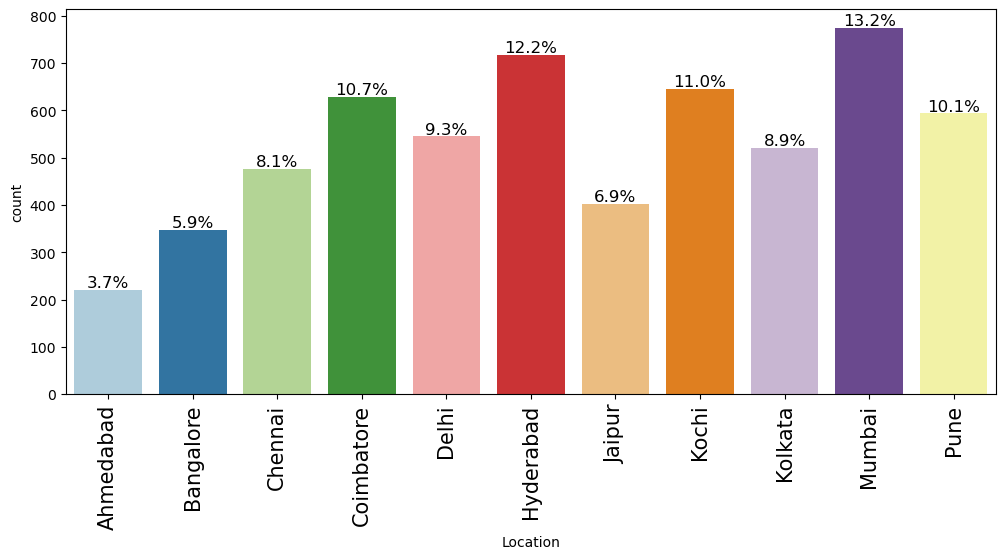

In [49]:
labeled_barplot(usedcars_data, "Location",perc=True)

- From the visualization, it depicts Mumbai has the highest location where
used cars is sold or availbale for purchase (13.2%)


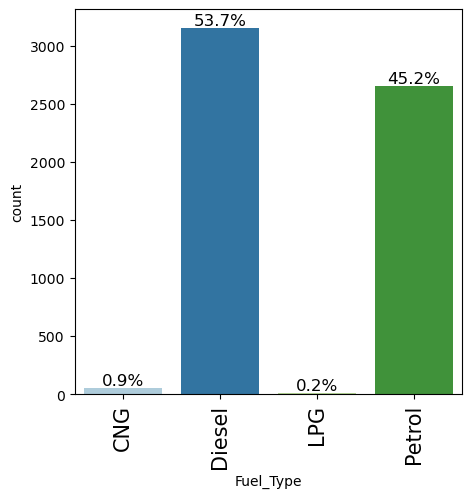

In [50]:
labeled_barplot(usedcars_data,"Fuel_Type",perc=True)

- Approximately 54% of the  used cars has Diesel as their fuel type

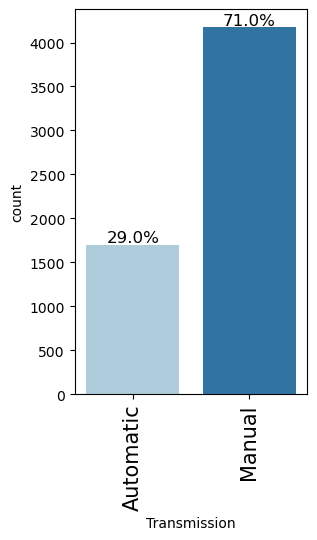

In [51]:
labeled_barplot(usedcars_data, "Transmission", perc=True)

- 71% of the used cars have manual transmission

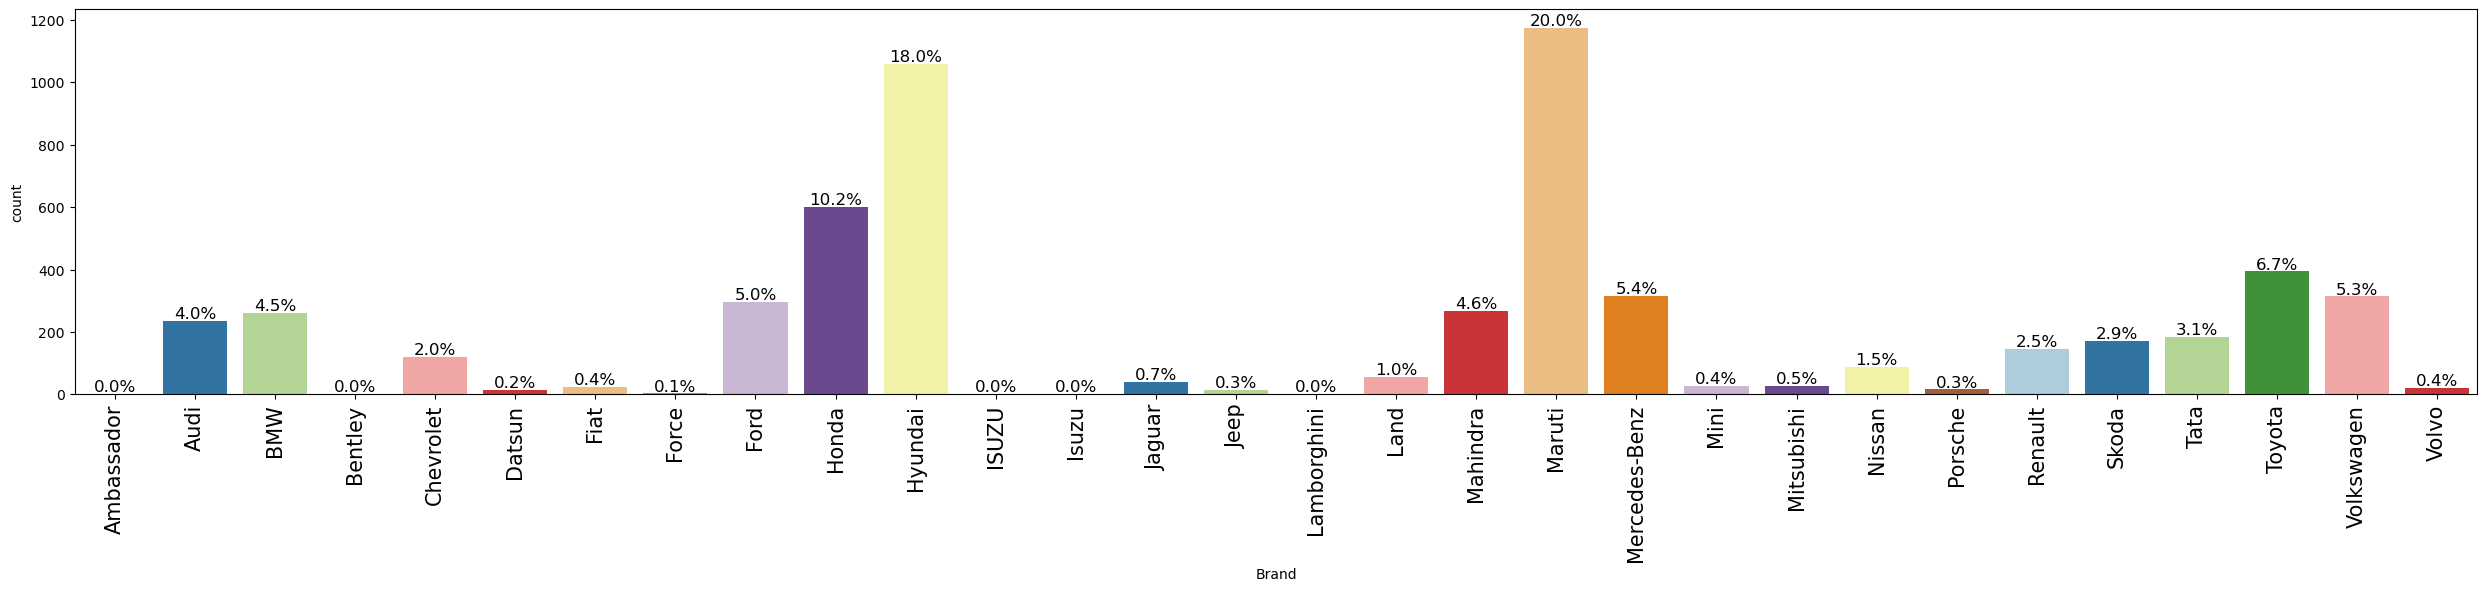

In [52]:
labeled_barplot(usedcars_data,"Brand", perc=True)

- Maruti is the highest brand of used cars sold while lamborgini is the least
  due to the price

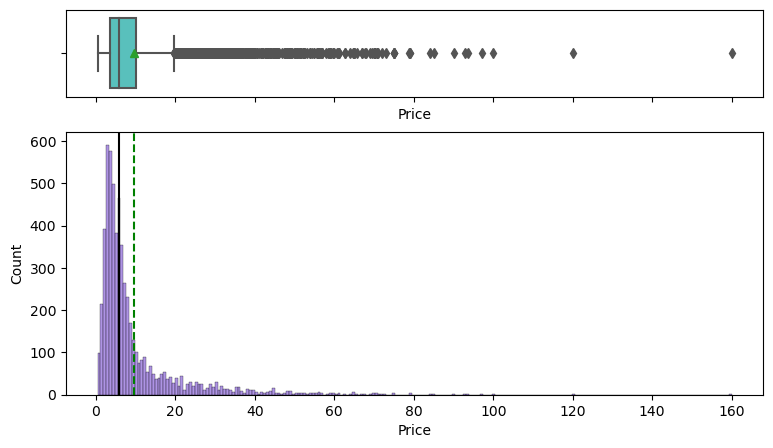

In [53]:
# Price (Target variable) To visualize the target variable

histogram_boxplot(data = usedcars_data, feature = "Price")

Observation

- It can be observed that the target variable (Price) is right skewed which implies the mean is highr than the median
- There are also few outliers 

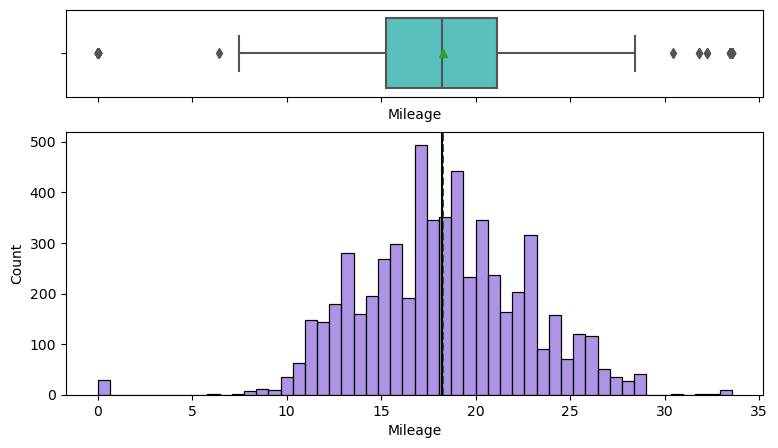

In [54]:
histogram_boxplot(data = usedcars_data, feature = "Mileage")

Observation

- It can be deduced that the mileage is normally distributed though with 
  few outliers

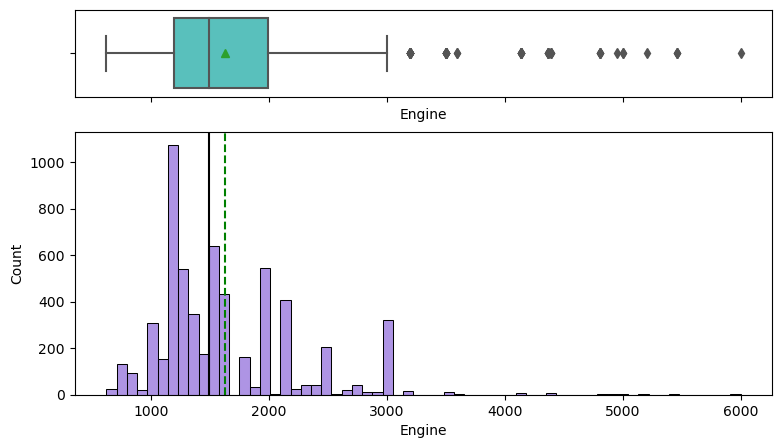

In [55]:
histogram_boxplot(data = usedcars_data, feature= "Engine")

Observations

- There are quiet high number of outliers and the it is right skewed

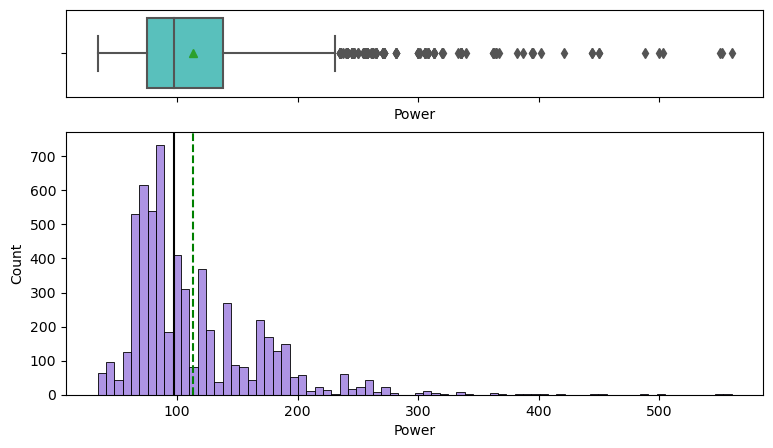

In [56]:
histogram_boxplot(data = usedcars_data, feature= "Power")

# BIVARIANT ANALYSIS

In [57]:
numeric_columns = usedcars_data.select_dtypes(include= "number")

corr_mat = numeric_columns.corr()

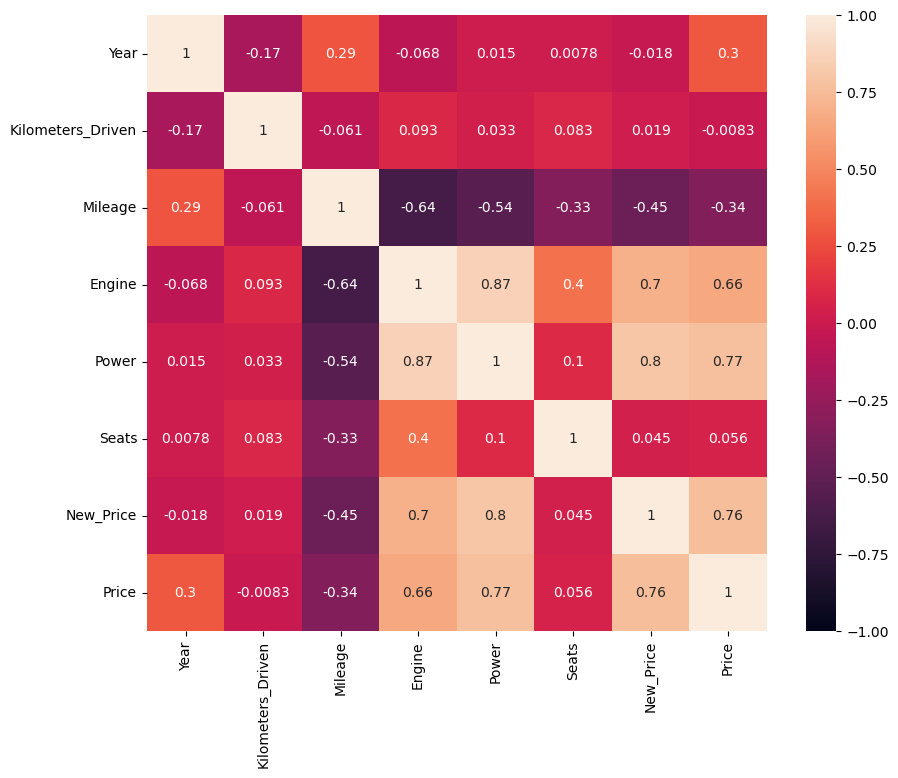

In [99]:
# CHECKING THE CORRELATION BETWEEN THE NUMERICLA COLUMNS

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True)
plt.show()


Observation

- The target feature(Price) is highly correlated with Engine and Power.


# Selecting the features and the Target

In [59]:
# To drop the target and some other variables that are not important for building the model

x = usedcars_data.drop(["Price", "Name","Mmodel","New_Price", "Owner_Type"],axis = 1)
y = usedcars_data["Price"]

In [60]:
# To get the shape of the dataset after dropping the target

x.shape

(5874, 10)

In [61]:
x.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Seats,Brand
0,Mumbai,2010,72000,CNG,Manual,26.60,998.0,58.16,5.0,Maruti
1,Pune,2015,41000,Diesel,Manual,19.67,1582.0,126.20,5.0,Hyundai
2,Chennai,2011,46000,Petrol,Manual,18.20,1199.0,88.70,5.0,Honda
3,Chennai,2012,87000,Diesel,Manual,20.77,1248.0,88.76,7.0,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,5.0,Audi


# Creating Dummy Variables

- One hot encding will assist convert our text to numeric and create new columns
for the variable concerned.

In [62]:
# To drop the first column when using one hot encoder
x = pd.get_dummies(x, drop_first= True)

In [63]:
x.shape

(5874, 49)

In [64]:
x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
x.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

# Train and test Data sets

In [66]:
# Spliting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state= 0 )

In [67]:
x_train.shape

(4111, 49)

In [68]:
x_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
2224,2016,36681,23.59,1364.0,67.06,5.0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2691,2014,48000,22.32,1582.0,126.32,5.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,2008,73000,8.50,4806.0,500.00,5.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2157,2016,24347,15.80,1591.0,121.30,5.0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1797,2019,20877,18.16,1197.0,78.90,5.0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [69]:
x_test.shape

(1763, 49)

#Data Normalization

In [70]:
# Scaling the train and test set
scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

# Building Linear Regression Model

In [71]:
lin_reg = LinearRegression()

In [72]:
lin = lin_reg.fit(x_train_sc, y_train)

In [73]:
LinearRegression()

LinearRegression()

In [74]:
lin

LinearRegression()

# Check the Model performance on Train Set

In [75]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE" :mape,
        },
        index=[0],
    )

    return df_perf

In [76]:
model_train_perf = model_performance_regression(lin,x_train_sc, y_train)

In [77]:
model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.040031,2.82929,0.790724,0.788199,56.755614


- With the R square, the model is able to explain approximately 79% of 
the variation in the price.
- The RMSE and MAE are both higher than 1


In [78]:
from sklearn import linear_model

# USING RIDGE REGRESSION

In [79]:
ridge = linear_model.Ridge(alpha=2.0)
ridge.fit(x_train_sc, y_train)

Ridge(alpha=2.0)

In [80]:
model_train_ridge_perf = model_performance_regression(ridge,x_train_sc,y_train)

In [81]:
model_train_ridge_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.040032,2.828607,0.790724,0.788199,56.718784


-The model was able to explain 79% of the variation in the price using Rsquared
- The RMSE and MAE are both higher than 1


In [82]:
model_test_ridde_perf = model_performance_regression(ridge,x_test_sc,y_test)

In [83]:
model_test_ridde_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.948432,3.004142,0.744402,0.737091,53.30358


# USING LASSO REGRESSION

In [84]:
lasso = linear_model.Lasso(alpha=0.2)
lasso.fit(x_train_sc, y_train)

Lasso(alpha=0.2)

In [85]:
#Getting the model performance for trained data set using lasso
model_train_lasso_perf =model_performance_regression(lasso,x_train_sc,y_train)

In [86]:
model_train_lasso_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.17196,2.878193,0.779625,0.776966,55.109905


In [87]:
model_test_lasso_perf = model_performance_regression(lasso,x_test_sc,y_test)

In [88]:
model_test_lasso_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,6.011436,2.996582,0.738959,0.731492,51.45098


# FEATURE SELECTION

In [89]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [90]:
# importing the Sequentialfeatureselection from feature selection module

from mlxtend.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(estimator= lin, k_features = x_train.shape[1], n_jobs= -1, verbose = 2)
sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  42 out of  49 | elapsed:    7.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    7.6s finished

[2023-02-11 22:43:15] Features: 1/49 -- score: 0.5958070731972601[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished

[2023-02-11 22:43:16] Features: 2/49 -- score: 0.6835796340455483[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.3s finished

[2023-02-11 22:43:16] Features: 3/49 -- score: 0.7019135472464215[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:    0.3s finished

[2023-02-11 22:43:17] Features: 4/49 -- score: 0.7177420368245473[Para

[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.3s finished

[2023-02-11 22:43:37] Features: 36/49 -- score: 0.7826697609972788[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.3s finished

[2023-02-11 22:43:37] Features: 37/49 -- score: 0.7824086193199227[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2023-02-11 22:43:38] Features: 38/49 -- score: 0.7826325128373567[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2023-02-11 22:43:38] Features: 39/49 -- score: 0.7807770360643366[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 co

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(49, 49),
                          n_jobs=-1, scoring='r2', verbose=2)

In [97]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

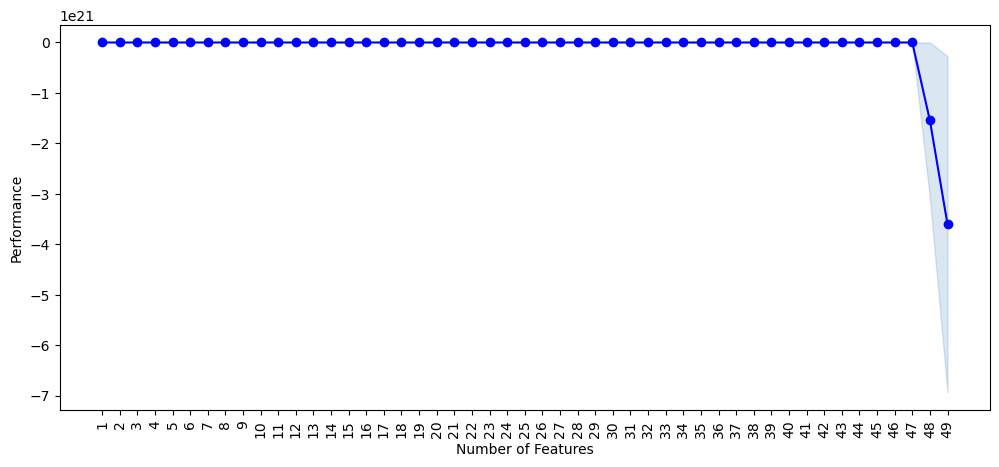

In [98]:
diagram2 = plot_sfs(sfs.get_metric_dict(),kind = "std_err", figsize = (12,5))
plt.xticks(rotation =90)
plt.show()

 Observation

- Am worried why the graph plotted the other way round
- 



In [93]:
#to display the visualization of missing values
# import missingno as msno

In [95]:
# # plt.style.use("ggplot")
# # To select all the numeric columns.
# numeric_columns = usedcars_data.select_dtypes(include=np.number).columns.to_list()

# plt.figure(figsize=(25,30))

# for i, variable in enumerate(numeric_columns):
        
#         plt.subplot(15,3, i+1)
#         sns.histplot(usedcars_data, kde=False,color ="Green")
#         plt.tight_layout()
#         plt.title(variable)

        


